In [22]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
from pytictoc import TicToc
import math
from random import gauss
from random import seed
from pandas import Series
import sdeint
from numpy import linalg as LA
import itertools
# from pactools import Comodulogram, REFERENCES
# from pactools import simulate_pac

#I_i = np.linspace(0.4,0.6,11)
#I_e = np.linspace(0.2,0.6,11)
#I_i=np.array([0.2,0.3,0.35,0.4,0.5])
#I_e =np.array([0.4])
#inputs = list(itertools.product(I_i,I_e))
#version 2
# I_i=np.array([0.4])
# I_e =np.array([0.3,0.39,0.5])
# inputs = list(itertools.product(I_e,I_i))
#version 3
I_i=np.array([0.35,45])
I_e =np.array([0.4])
inputs = list(itertools.product(I_e,I_i))
#singles
I_e=[0.45]
I_i= [0.35]
inputs = list(itertools.product(I_e,I_i))

def close(func, *args):
    def newfunc(x, t):
        return func(x, t, *args)
    return newfunc
    
    
def arr2str(arr):
    return ', '.join([f'{x:12.3f}' for x in arr])
    
def g_fun(z,t,P):
    sigma_a=P[0]
    sigma_b=P[1]
    sigma_c=P[2]
    sigma_d=P[3]
    sigma_e=P[4]
    sigma_f=P[5]
    sigma_g=P[6]    
       
    tau_y=P[7]
    
    return np.diag([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sigma_a*tau_y,sigma_b*tau_y,sigma_c*tau_y,sigma_d*tau_y,sigma_e*tau_y,sigma_f*tau_y,sigma_g*tau_y])


def model_MW(z,t,Q):
    
    ratio=0

    tau_a = Q[0]
    tau_b = Q[1]
    tau_c = Q[2]
    tau_Aa = Q[3]
    tau_Ab = Q[4]
    tau_r = Q[5]
    tau_n = Q[6]
    tau_sa = Q[7]
    tau_sb = Q[8]
    tau_va = Q[9]
    tau_vb = Q[10]
    
        
    gamma_a = Q[11]
    gamma_b = Q[12]
    gamma_Aa = Q[13]
    gamma_Ab = Q[14]
    gamma_c = Q[15]
    gamma_sa = Q[16]
    gamma_sb = Q[17]
    gamma_va = Q[18]
    gamma_vb = Q[19]
    
    gamma_ra = Q[20]
    gamma_rb = Q[21]
    gamma_rc = Q[22]
    gamma_rs = Q[23]
    gamma_v = Q[24]
    
        
    g_I = Q[25]
    c_1 = Q[26]
    c_0 = Q[27]
    r_0 = Q[28]
    
    a = Q[29]
    b = Q[30]
    d = Q[31]
    
    J_c = Q[32]
    J_ei = Q[33]
    J_ii = Q[34]
            
    J_0 = Q[35]
   
    J_s = Q[36]

    
    J_se = Q[37]   
    J_ce = Q[38]
    J_sp = Q[39]
    
    J_es = Q[40]

    
    J_pv = Q[41]
    J_sv = Q[42]
    
    J_vs = Q[43]
            

    
    J_Aa = Q[44]
    J_Ab = Q[45]
    
    J_Ia = Q[46]
    J_Ib = Q[47]   
        
           
    p1 = Q[48]
    p2 = Q[49] 
    
    Iback_a = Q[50]
    Iback_b = Q[51]
    Iback_c = Q[52]
    
    Iback_d = Q[53]
    Iback_e = Q[54]
    
        
    Iback_f = Q[55]
    Iback_g = Q[56]  
    
    fq=8*math.pi #4HZ

    ca_F=0.1
    ca_G=0.1
          
    Iback_a += ca_F*np.sin(fq*t)
    Iback_b += ca_G*np.sin(fq*t)
    
    #Iback_f += ca_F*np.sin(fq*t)
    #Iback_g += ca_G*np.sin(fq*t)
    
    I_a = Q[57]
    I_b = Q[58]
    I_c = Q[59]
    
    I_va = Q[60]
    I_vb = Q[61]
    
    eta=tau_c*gamma_c*c_1/(g_I-J_ii*tau_c*gamma_c*c_1)
    J_ie = (J_0-J_s-J_c)/(2*J_ei*eta)
    
    idx=(t>4 and t<6)
    idy=(t>12 and t<14)
    
    #uncomment for input
    #I_va = I_va*idy
    #I_vb = I_va*idy
    
    I_a = I_a*idx
    I_b = I_b*idx
    I_c = I_c*idx
    
    
    
    #-------------------------------------------------------------
        
    dz=np.zeros(23)
    
    sa    = z[0]
    sb    = z[1]
    sc    = z[2]
    s_Aa  = z[3]
    s_Ab  = z[4]
    st_a  = z[5]
    st_b  = z[6]
    s_va  = z[7]
    s_vb  = z[8]
    r_a   = z[9]
    r_b   = z[10]
    r_c   = z[11]
    r_d   = z[12]
    r_e   = z[13]
    r_f   = z[14]
    r_g   = z[15]
    y_a   = z[16]
    y_b   = z[17]
    y_c   = z[18]
    y_d   = z[19]
    y_e   = z[20]
    y_f   = z[21]
    y_g   = z[22]
    
       
    input_a  = J_s *sa +J_c *sb +J_ei*sc +J_Aa*s_Aa +J_Ab*s_Ab                        + J_es*st_a            + Iback_a + I_a  + y_a
    input_b  = J_c *sa +J_s *sb +J_ei*sc +J_Ab*s_Aa +J_Aa*s_Ab                                   +J_es*st_b  + Iback_b + I_b  + y_b
    input_c  = J_ie*sa +J_ie*sb +J_ii*sc +J_Ia*s_Aa +J_Ib*s_Ab                                               + Iback_c + I_c  + y_c
    input_sa = J_se*sa +J_ce*sb          +J_sp*s_Aa            +J_vs*s_va                                    + Iback_d        + y_d
    input_sb = J_ce*sa +J_se*sb                     +J_sp*s_Ab             +J_vs*s_vb                        + Iback_e        + y_e
    input_va = J_pv*sa                                                                +J_sv*st_a             + Iback_f + I_va + y_f
    input_vb =          J_pv*sb                                                                  +J_sv*st_b  + Iback_g + I_vb + y_g
    
    # print(f'''J=
    # exc1: {input_a :12.3f} = {J_s :10.3f} sa + {J_c :12.3f} sb + {J_ei:12.3f} sc + {J_Aa:12.3f} sAa + {J_Ab:12.3f} sAb +                                       + {J_es:12.3f} s_st1                      + {Iback_a} Iback + {I_a}  I + {y_a} y
    # exc2: {input_b :12.3f} = {J_c :10.3f} sa + {J_s :12.3f} sb + {J_ei:12.3f} sc + {J_Ab:12.3f} sAa + {J_Aa:12.3f} sAb +                                                            + {J_es:12.3f} s_st2 + {Iback_b} Iback + {I_b}  I + {y_b} y
    # pv  : {input_c :12.3f} = {J_ie:10.3f} sa + {J_ie:12.3f} sb + {J_ii:12.3f} sc + {J_Ia:12.3f} sAa + {J_Ib:12.3f} sAb +                                                                                 + {Iback_c} Iback + {I_c}  I + {y_c} y
    # sst1: {input_sa:12.3f} = {J_se:10.3f} sa + {J_ce:12.3f} sb                   + {J_sp:12.3f} sAa                    + {J_vs:12.3f} s_va                                                               + {Iback_d} Iback            + {y_d} y
    # sst2: {input_sb:12.3f} = {J_ce:10.3f} sa + {J_se:12.3f} sb                                      + {J_sp:12.3f} sAb                     + {J_vs:12.3f} s_vb                                           + {Iback_e} Iback            + {y_e} y
    # vip1: {input_va:12.3f} = {J_pv:10.3f} sa                                                                                                                   + {J_sv:12.3f} s_st1                      + {Iback_f} Iback + {I_va} I + {y_f} y
    # vip2: {input_vb:12.3f} =                   {J_pv:12.3f} sb                                                                                                                      + {J_sv:12.3f} s_st2 + {Iback_g} Iback + {I_vb} I + {y_g} y
    # ''')
    # print(f'''
    # input_a:  {input_a :>8.3f}  sa: {sa:12.3f}
    # input_b:  {input_b :>8.3f}  sb: {sb:12.3f}
    # input_c:  {input_c :>8.3f}  sc: {sc:12.3f}
    #                     s_Aa: {s_Aa:12.3f}
    #                     s_Ab: {s_Ab:12.3f}
    # input_va: {input_va:>8.3f}   s_va: {s_va:12.3f}
    # input_vb: {input_vb:>8.3f}   s_vb: {s_vb:12.3f}
    # input_sa: {input_sa:>8.3f}   st_a: {st_a:12.3f}
    # input_sb: {input_sb:>8.3f}   st_b: {st_b:12.3f}
    # ''')
    print(f'y= {y_a:12.3f} {y_b:12.3f} {y_c:12.3f} {y_d:12.3f} {y_e:12.3f} {y_f:12.3f} {y_g:12.3f}')
    
    inp_opto_sa = ratio*input_sa
    inp_opto_sb = ratio*input_sb
    input_sa -= inp_opto_sa
    input_sb -= inp_opto_sb
    
    _inputs = [
        input_a,input_b,
        input_c,
        input_sa,input_sb,
        input_va,input_vb,
    ]

    
    g1=1
    
    phi_a = g1*p1*(a*input_a-b)/(1-np.exp(-d*(a*input_a-b)))    
    phi_b = g1*p2*(a*input_b-b)/(1-np.exp(-d*(a*input_b-b)))

    g1=int(input_c>=(c_0-r_0*g_I)/c_1)
    phi_c = g1*(((c_1*input_c-c_0)/g_I)+r_0)
    
    g1=int(input_sa>=(c_0-r_0*g_I)/c_1)
    phi_sa = g1*(((c_1*input_sa-c_0)/g_I)+r_0)
    
    g1=int(input_sb>=(c_0-r_0*g_I)/c_1)
    phi_sb = g1*(((c_1*input_sb-c_0)/g_I)+r_0) 
    
    g1=int(input_va>=(c_0-r_0*g_I)/c_1)
    phi_va = g1*(((c_1*input_va-c_0)/g_I)+r_0)
    
    g1=int(input_vb>=(c_0-r_0*g_I)/c_1)
    phi_vb = g1*(((c_1*input_vb-c_0)/g_I)+r_0) 

    _phi = [
        phi_a,phi_b,
        phi_c,
        phi_sa,phi_sb,
        phi_va,phi_vb,
    ]
    print(f'''
inputs: {_inputs}
g1 = {g1}    p1 = {p1}    p2 = {p2}    a = {a}    b = {b}
phi: {_phi}
    ''')


    dsa = (-(sa/tau_a)+(1-sa)*gamma_a*r_a)
    dsb = (-(sb/tau_b)+(1-sb)*gamma_b*r_b)
    
    ds_Aa = (-(s_Aa/tau_Aa)+gamma_Aa*r_a)
    ds_Ab = (-(s_Ab/tau_Ab)+gamma_Ab*r_b)
    
    dst_a = (-(st_a/tau_sa)+gamma_sa*r_d)
    dst_b = (-(st_b/tau_sb)+gamma_sb*r_e)
    
    ds_va = (-(s_va/tau_va)+gamma_va*r_f)
    ds_vb = (-(s_vb/tau_vb)+gamma_vb*r_g)
    
    dsc = (-(sc/tau_c)+gamma_c*r_c)
    _ds = [
        dsa,dsb,
        dsc,
        dst_a,dst_b,
        ds_va,ds_vb,
    ]
    _dsA = [
        ds_Aa,ds_Ab,
        0,0,0,0,0,
    ]

    dr_a = ((phi_a-r_a)/tau_r)*gamma_ra
    dr_b = ((phi_b-r_b)/tau_r)*gamma_rb
    dr_c = ((phi_c-r_c)/tau_r)*gamma_rc
    dr_d = ((phi_sa-r_d)/tau_r)*gamma_rs
    dr_e = ((phi_sb-r_e)/tau_r)*gamma_rs
    dr_f = ((phi_va-r_f)/tau_r)*gamma_v
    dr_g = ((phi_vb-r_g)/tau_r)*gamma_v
    _dr = [
        dr_a,dr_b,
        dr_c,
        dr_d,dr_e,
        dr_f,dr_g,
    ]

    dy_a = -(y_a/tau_n)
    dy_b = -(y_b/tau_n)
    dy_c = -(y_c/tau_n)
    dy_d = -(y_d/tau_n)
    dy_e = -(y_e/tau_n)
    dy_f = -(y_f/tau_n)
    dy_g = -(y_g/tau_n)
    
    _dy = [
        dy_a,dy_b,
        dy_c,
        dy_d,dy_e,
        dy_f,dy_g,
    ]
        
    dz[0]  = dsa
    dz[1]  = dsb
    dz[2]  = dsc
    dz[3]  = ds_Aa
    dz[4]  = ds_Ab
    dz[5]  = dst_a
    dz[6]  = dst_b
    dz[7]  = ds_va
    dz[8]  = ds_vb
    dz[9]  = dr_a
    dz[10]  = dr_b
    dz[11]  = dr_c
    dz[12] = dr_d
    dz[13] = dr_e
    dz[14] = dr_f
    dz[15] = dr_g
    dz[16] = dy_a
    dz[17] = dy_b
    dz[18] = dy_c
    dz[19] = dy_d
    dz[20] = dy_e
    dz[21] = dy_f
    dz[22] = dy_g
    
    print(f't: {t}')
    print(f'input: {arr2str(_inputs)}')
    print(f'phi:   {arr2str(_phi)}')
    print(f'ds:    {arr2str(_ds)}')
    print(f'dsA:   {arr2str(_dsA)}')
    print(f'dr:    {arr2str(_dr)}')
    print(f'dy:    {arr2str(_dy)}')
    
    
    return dz 


In [23]:
d2=sdeint.itoint(close(model_MW, *Qp1), close(g_fun,*P), z1, t)

J=
    exc1:        0.663 =      0.481 sa +        0.011 sb +       -0.360 sc +        3.040 sAa +        1.400 sAb +                                       +       -0.450 s_st1                      + 0.45 Iback + 0.0  I + 0.0 y
    exc2:        0.663 =      0.011 sa +        0.481 sb +       -0.360 sc +        1.400 sAa +        3.040 sAb +                                                            +       -0.450 s_st2 + 0.45 Iback + 0.0  I + 0.0 y
    pv  :        0.632 =      0.301 sa +        0.301 sb +       -0.120 sc +        2.560 sAa +        2.560 sAb +                                                                                 + 0.35 Iback + 0.0  I + 0.0 y
    sst1:        0.163 =      0.350 sa +        0.000 sb                   +        0.250 sAa                    +       -0.350 s_va                                                               + 0.15 Iback            + 0.0 y
    sst2:        0.163 =      0.000 sa +        0.350 sb                                      +

In [20]:
    inp = 0
    t_in = TicToc() #create instance of class

    t_in.tic() #Start timer

    ## Parameter for noise
    sigma_a = 6 #2.5
    sigma_b = 6 
    sigma_c = 2.5
    sigma_d = 2.5
    sigma_e = 2.5
    sigma_f = 2.5
    sigma_g = 2.5
    tau_y = 0.01

    P=[[sigma_a,sigma_b,sigma_c,sigma_d,sigma_e,sigma_f,sigma_g,tau_y]]


    ## Setting the background current

    #pp1 = 0.48
    #pp2 = 0.40

    #pp1 = 0.48
    #pp2 = 0.70

    #pp1 = 0.48
    #pp2 = 0.50

    #pp1 = 0.40
    #pp2 = 0.50

    #pp1 = 0.60
    #pp2 = 0.50

    pp1=inputs[inp][0]
    pp2=inputs[inp][1]
    print(pp1,pp2)

    ## Parameters for the system
    tau_a = 0.0288
    tau_b = 0.0288
    tau_c = 0.0024
    tau_Aa = 0.00096
    tau_Ab = 0.00096
    tau_r = 0.002
    tau_n = 0.00096
    tau_sa = 0.0072
    tau_sb = 0.0072
    tau_va = 0.0072
    tau_vb = 0.0072


    gamma_a = 2.675
    gamma_b = 2.675
    gamma_Aa = 2.075
    gamma_Ab = 2.075
    gamma_c = 4.1625
    gamma_sa = 2.075
    gamma_sb = 2.075
    gamma_va = 2.075
    gamma_vb = 2.075
    # good

    gamma_ra = 1.0
    gamma_rb = 1.0
    gamma_rc = 1.0
    gamma_rs = 1.0
    gamma_v = 1.0


    g_I = 4
    c_1 = 615
    c_0 = 177
    r_0 = 5.5

    a = 135
    b = 54
    d = 0.308

    J_c = 0.0107
    J_ei = -0.36
    J_ii = -0.12

    J_0 = 0.2112

    J_s = 0.4813


    J_se = 0.35   
    J_ce = 0.0
    J_sp = 0.25

    J_es = -0.45

    J_pv = 0.45
    J_sv = -0.35
    J_vs = -0.35

    J_Aa = 3.8 *0.8
    J_Ab = 1.75 *0.8
    J_Ia = 3.2 *0.8
    J_Ib = 3.2 *0.8  


    p1 = 1.0
    p2 = 1.0 

    Iback_a = pp1 # 0.45
    Iback_b = pp1 # 0.45
    Iback_c = pp2 # 0.35

    Iback_d = 0.15
    Iback_e = 0.15


    Iback_f = 0.0
    Iback_g = 0.0  

    I_a = 0.0
    I_b = 0.0
    I_c = 0.0

    I_va = 0.2
    I_vb = 0.2

    Q=[
      tau_a,tau_b,tau_c,tau_Aa,tau_Ab,tau_r,tau_n,tau_sa,tau_sb,tau_va,tau_vb, #11
      gamma_a,gamma_b,gamma_Aa,gamma_Ab,gamma_c,gamma_sa,gamma_sb,gamma_va,gamma_vb, #9
      gamma_ra,gamma_rb,gamma_rc,gamma_rs,gamma_v, #5
      g_I,c_1,c_0,r_0,a,b,d,J_c,J_ei,J_ii,J_0,J_s,J_se,J_ce,J_sp,J_es,J_pv,J_sv,J_vs,J_Aa,J_Ab,J_Ia,J_Ib,p1,p2,Iback_a,Iback_b,Iback_c,Iback_d,Iback_e,Iback_f,Iback_g,I_a,I_b,I_c,I_va,I_vb]


    ##Input Parameters

    Qp0=[np.array(Q)]
    Qp1=[np.array(Q)]

    #Qp[0][50]=Iback_a
    #Qp[0][51]=Iback_b
    #Qp[0][52]=Iback_c

    #Qp[0][57]=I_a
    #Qp[0][58]=I_b
    #Qp[0][59]=I_c

    #Qp[0][60]=I_va
    #Qp[0][61]=I_vb
    ##

    Qp1[0][50]=pp1
    Qp1[0][51]=pp1
    Qp1[0][52]=pp2

    # this is where you can adjust the external input to the excitatory population
    Qp1[0][57]=0.3
    Qp1[0][58]=0.0
    Qp1[0][59]=0.0

    #Qp1[0][60]=0.2
    #Qp1[0][61]=0.2

    #print([Qp1[0][57],Qp0[0][57]])

    ##Solve the system
    z1=[0.05,0.05,0.03,0.05,0.05,0.05,0.05,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

    #Np=10
    #nn1=100001

    # Np=50
    # nn1=500001
    Np=1
    nn1=1001

    Te=Np


    t = np.linspace(0,Np,nn1)
    T = np.linspace(0,Np*1000,nn1)

    clr=['b','r']

    nn1-1
  #  fig1, axs = plt.subplots(3,2) 
  #  fig2, ax = plt.subplots(3,2)
  #  fig3, ax1 = plt.subplots(3,2)


    for i in range(1):

        if i==0:
            d2=sdeint.itoint(close(model_MW, *Qp1), close(g_fun,*P), z1, t)
#d4 is optpo - short time
# d1 is opto - long time
#d2 is no opto - long time

0.45 0.35

inputs: [0.6633, 0.6633, 0.6324712449034401, 0.1625, 0.1625, 0.20500000000000002, 0.20500000000000002]
g1 = 0    p1 = 1.0    p2 = 1.0    a = 135.0    b = 54.0
phi: [35.546125360145766, 35.546125360145766, 58.49245390390391, -0.0, -0.0, -0.0, -0.0]
    
t: 0.0
input:        0.663,        0.663,        0.632,        0.163,        0.163,        0.205,        0.205
phi:         35.546,       35.546,       58.492,       -0.000,       -0.000,       -0.000,       -0.000
ds:          -1.736,       -1.736,      -12.500,       -6.944,       -6.944,       -6.944,       -6.944
dsA:        -52.083,      -52.083,        0.000,        0.000,        0.000,        0.000,        0.000
dr:       17773.063,    17773.063,    29246.227,       -0.000,       -0.000,       -0.000,       -0.000
dy:          -0.000,       -0.000,       -0.000,       -0.000,       -0.000,       -0.000,       -0.000

inputs: [0.6633, 0.6633, 0.6324712449034401, 0.1625, 0.1625, 0.20500000000000002, 0.20500000000000002]
g

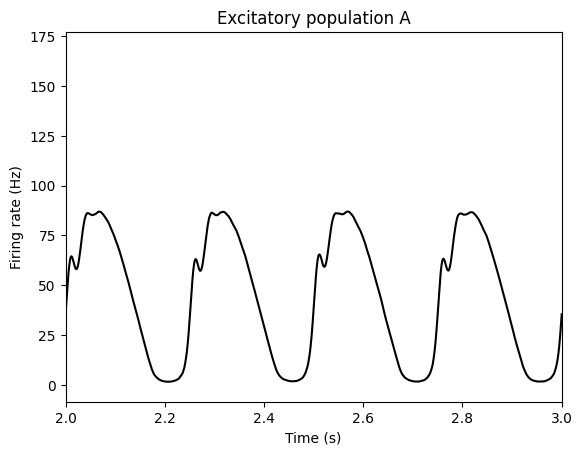

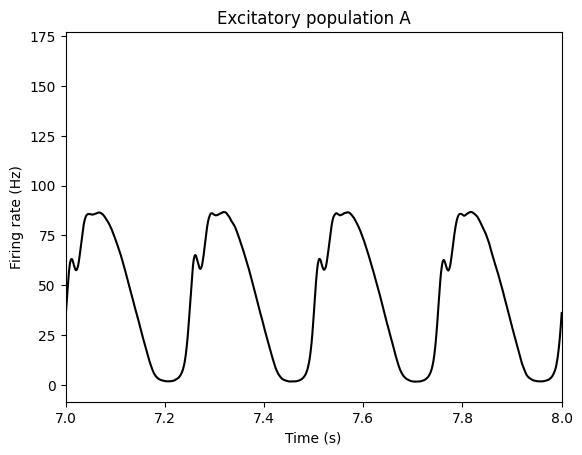

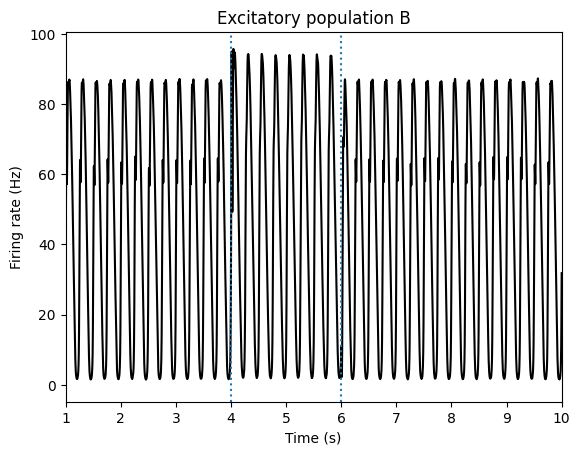

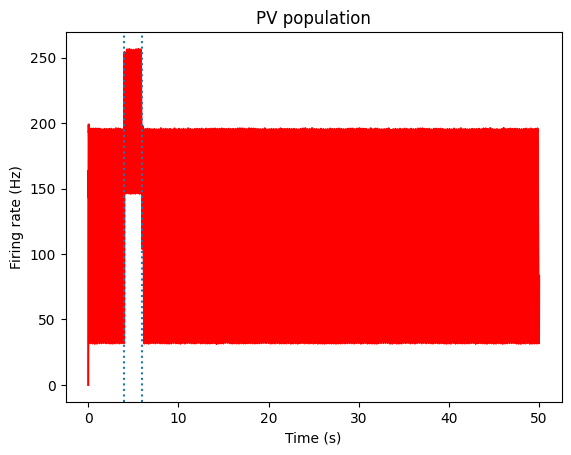

In [5]:
ns=0
plt.plot(t[ns:nn1],d2[ns:nn1,9],color="black")
plt.xlabel("Time (s)")
plt.ylabel("Firing rate (Hz)")
plt.title("Excitatory population A")
plt.xlim([2,3])
plt.axvline(x=4, ls=':')
#plt.ylim([0,100])
plt.axvline(x=6,  ls=':')
plt.show()

plt.plot(t[ns:nn1],d2[ns:nn1,9],color="black")
plt.xlabel("Time (s)")
plt.ylabel("Firing rate (Hz)")
plt.title("Excitatory population A")
plt.xlim([7,8])
plt.axvline(x=4, ls=':')
#plt.ylim([0,100])
plt.axvline(x=6,  ls=':')
plt.show()

plt.plot(t[ns:nn1],d2[ns:nn1,10],color="black")
plt.xlabel("Time (s)")
plt.ylabel("Firing rate (Hz)")
plt.title("Excitatory population B")
plt.axvline(x=4, ls=':')
plt.axvline(x=6,  ls=':')
plt.xlim([1,10])
plt.show()
plt.plot(t[ns:nn1],d2[ns:nn1,11],color="red")
plt.xlabel("Time (s)")
plt.ylabel("Firing rate (Hz)")
plt.axvline(x=4, ls=':')
plt.axvline(x=6,  ls=':')
#plt.ylim([0,150])
plt.title("PV population")
plt.show()

In [4]:
signal2 = d4[ns:nn1,9]

In [5]:
#signal2 = signal2[61000:]

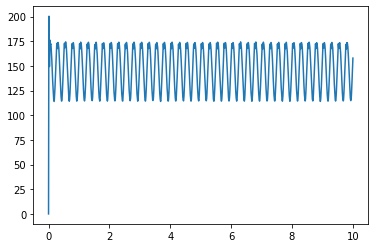

In [6]:
plt.plot(t[ns:nn1],signal2)

ozkurt... 
canolty... 
tort... 
penny... 
vanwijk... 
duprelatour... 


C:\Users\palavia\Anaconda3\lib\site-packages\pactools\dar_model\base_dar.py:699: RuntimeWarning: overflow encountered in exp
  sigma2 = np.exp(2 * logsigma) + EPSILON
C:\Users\palavia\Anaconda3\lib\site-packages\pactools\dar_model\base_dar.py:699: RuntimeWarning: overflow encountered in exp
  sigma2 = np.exp(2 * logsigma) + EPSILON
C:\Users\palavia\Anaconda3\lib\site-packages\pactools\dar_model\base_dar.py:699: RuntimeWarning: overflow encountered in exp
  sigma2 = np.exp(2 * logsigma) + EPSILON


colgin... 
sigl... 
bispectrum... 


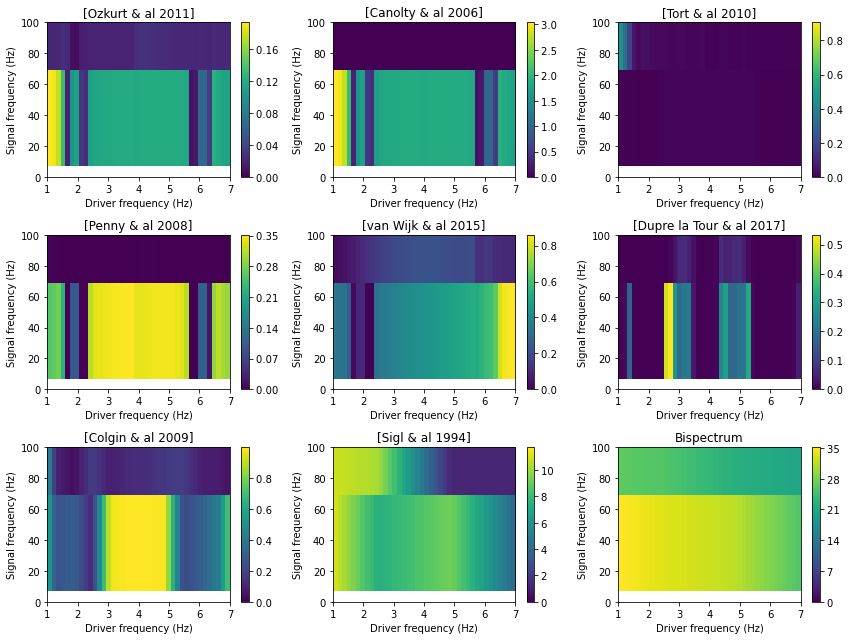

In [38]:
# Define the subplots where the comodulogram will be plotted
n_lines = 3
n_columns = int(np.ceil(len(methods) / float(n_lines)))
fig, axs = plt.subplots(
    n_lines, n_columns, figsize=(4 * n_columns, 3 * n_lines))
axs = axs.ravel()

#params
fs=10000
low_fq_range = np.linspace(1, 7, 40)
low_fq_width = 1.0  # Hz

# Compute the comodulograms and plot them
for ax, method in zip(axs, methods):
    print('%s... ' % (method, ))
    estimator = Comodulogram(fs=fs, low_fq_range=low_fq_range,
                             low_fq_width=low_fq_width, method=method,
                             progress_bar=False)
    estimator.fit(signal2)
    estimator.plot(titles=[REFERENCES[method]], axs=[ax])
    ax.set_ylim([0, 100])

plt.show()

In [39]:
a=1

In [ ]:
#dont run from here

In [ ]:
fs = 200.  # Hz
high_fq = 50.0  # Hz
low_fq = 5.0  # Hz
low_fq_width = 1.0  # Hz

n_points = 10000
noise_level = 0.4

signal = simulate_pac(n_points=n_points, fs=fs, high_fq=high_fq, low_fq=low_fq,
                      low_fq_width=low_fq_width, noise_level=noise_level,
                      random_state=0)

low_fq_range = np.linspace(1, 10, 50)
methods = [
    'ozkurt', 'canolty', 'tort', 'penny', 'vanwijk', 'duprelatour', 'colgin',
    'sigl', 'bispectrum'
]
low_fq_width = 1.0  # Hz
# Define the subplots where the comodulogram will be plotted
n_lines = 3
n_columns = int(np.ceil(len(methods) / float(n_lines)))
fig, axs = plt.subplots(
    n_lines, n_columns, figsize=(4 * n_columns, 3 * n_lines))
axs = axs.ravel()


# Compute the comodulograms and plot them
for ax, method in zip(axs, methods):
    print('%s... ' % (method, ))
    estimator = Comodulogram(fs=fs, low_fq_range=low_fq_range,
                             low_fq_width=low_fq_width, method=method,
                             progress_bar=False)
    estimator.fit(signal)
    estimator.plot(titles=[REFERENCES[method]], axs=[ax])
    #ax.set_ylim([0, 80])

plt.show()

In [ ]:
from tensorpac import Pac
from tensorpac.signals import pac_signals_wavelet

sf=(nn1-1)/Np

data2=d2[70000:,0].reshape((1,len(d2[70000:,0])))
sf=(nn1-1)/Np  #sampling frequence
p = Pac(f_pha='hres', f_amp='hres', dcomplex='wavelet')
# etract all of the phases and amplitudes
phases = p.filter(sf, data2, ftype='phase', n_jobs=1)
amplitudes = p.filter(sf, data2, ftype='amplitude', n_jobs=1)
plt.figure(figsize=(14, 8))
for i, k in enumerate([ 2]):
    # switch method of PAC
    p.idpac = (k, 0, 0)
    # compute only the pac without filtering
    xpac = p.fit(phases, amplitudes)
    # plot
    plt.subplot(2, 3, k)
    title = p.method.replace(' (', f' ({k})\n(')
    p.comodulogram(xpac.mean(-1), title=title, cmap='viridis')
    if k <= 3:
        plt.xlabel('')

plt.tight_layout()
plt.show()